In [1]:
import os
import torch
import random
import torch.nn as nn
import torch.backends.cudnn as cudnn
from models import build_model
import numpy as np
from PIL import Image

/home/jovyan/.mlspace/envs/video_vika/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/jovyan/.mlspace/envs/video_vika/lib/python3.10/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.0+cu118 with CUDA 1108 (you have 2.5.1+cu124)
    Python  3.10.11 (you have 3.10.15)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
/home/jovyan/.mlspace/envs/vide

Please 'pip install apex'
Please 'pip install apex'
Please 'pip install apex'
Please 'pip install apex'


/home/jovyan/.mlspace/envs/video_vika/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
from huggingface_hub import snapshot_download

#model_path = '/home/jovyan/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT/models'   # The local directory to save Video-LaVIT checkpoint
#snapshot_download("rain1011/Video-LaVIT-v1", local_dir=model_path, local_dir_use_symlinks=False, repo_type='model')


In [3]:
# The local directory to save LaVIT checkpoint, set to yours
model_path = "/home/jovyan/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT/models/language_model_sft"#"/home/jinyang06/models/VideoLaVIT-v1/language_model_sft"
model_dtype='bf16'

max_video_clips = 16
device_id = 0
torch.cuda.set_device(device_id)
device = torch.device('cuda')

seed = 42
#torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# For Multi-Modal Understanding
runner = build_model(model_path=model_path, model_dtype=model_dtype, understanding=True, 
        device_id=device_id, use_xformers=False, max_video_clips=max_video_clips, visualize_frame_selection = True)
print("Building Model Finsished")

Loading Video LaVIT Model Weight from /home/jovyan/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT/models/language_model_sft, model precision: bf16
Not used {}


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

/home/jovyan/.mlspace/envs/video_vika/lib/python3.10/site-packages/transformers/modeling_utils.py:488: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkp

The Visual Vocab Size is 16384
The llama tokenizer vocab size is 32000
The maximal clip number is 16
Building Model Finsished


In [4]:
#input = ffmpeg.input('/home/chekalina/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT/demo/video7013.mp4')
#video = input.video.filter("aecho", 0.8, 0.9, 1000, 0.3)
#video = input.video.hflip()
#out = ffmpeg.output(audio, video, 'out.mp4')

In [5]:
#!pip install --upgrade transformers

### Video Understanding

In [6]:
#from models.transform import LaVITImageProcessor, LaVITEvalVideoProcessor
#video_processor = LaVITEvalVideoProcessor(image_size=224, num_frames=24, fps=6, max_clips=8, visualize_frame_selection = True,)
#visual_inputs, motion_inputs = video_processor('/home/jovyan/shares/SR004.nfs2/data/LLaVA-Video-178K/LLaVA-Video-178K/0_30_s_academic_v0_1/academic_source/Charades/8UGNK.mp4')

## Select keyframes by hand

frame_types ['I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I']
len(frames) 169
len(motions) 169
start_indexs [  0  18  36  42  48  66  72  84  90  96 102 120 150 156]
frame shape (480, 270, 3)
motion shape

key_frame_indices [0, 18, 36, 42, 48, 66, 72, 84, 90, 96, 102, 120, 150, 156]


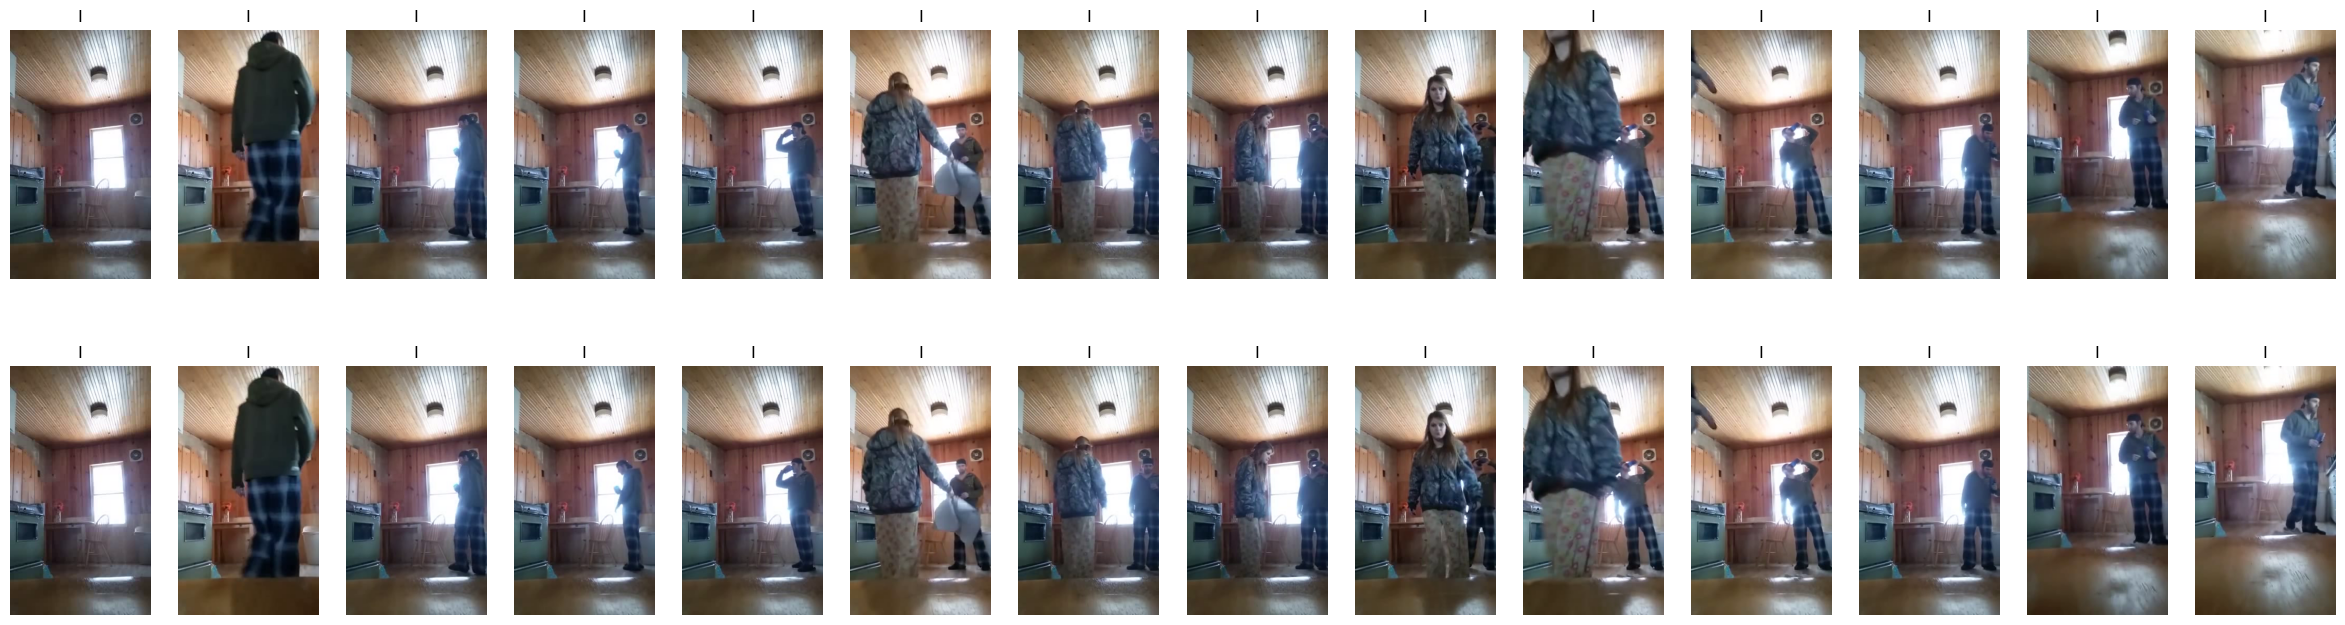

done!
[]
[['USER', "<video>\nProvide a comprehensive analysis of the video's content and themes?"]]
[['USER', "<video>\nProvide a comprehensive analysis of the video's content and themes?"], ['ASSISTANT', None]]
prompt A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <video>
Provide a comprehensive analysis of the video's content and themes? ASSISTANT:
["A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <video>\nProvide a comprehensive analysis of the video's content and themes? ASSISTANT:"]


/home/jovyan/.mlspace/envs/video_vika/lib/python3.10/site-packages/transformers/generation/utils.py:1417: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/home/jovyan/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT/models/modeling_motion_tokenizer.py:433: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


The video showcases a man and a woman in a kitchen, with the man holding a Wii remote and the woman walking around. The man then puts on a hat and drinks from a bottle, while the woman continues to walk around. The video seems to be a simple documentation of their activities in the kitchen.


In [4]:
video_path = '/home/jovyan/shares/SR004.nfs2/data/LLaVA-Video-178K/LLaVA-Video-178K/0_30_s_academic_v0_1/academic_source/Charades/8UGNK.mp4'
prompt = "Provide a comprehensive analysis of the video's content and themes?"

output = runner({"video": video_path, "text_input": prompt}, length_penalty=1, \
        use_nucleus_sampling=False, num_beams=1, max_length=512, temperature=1.0)[0]
print(output)

## Lavit keyframes

frame_types ['I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I', 'P', 'P', 'P', 'P', 'P', 'I']
len(frames) 169
len(motions) 169
start_indexs [  0   6  12  18  24  30  36  42  48  54  60  66  72  78  84  90  96 102
 108 114 120 126 132 13

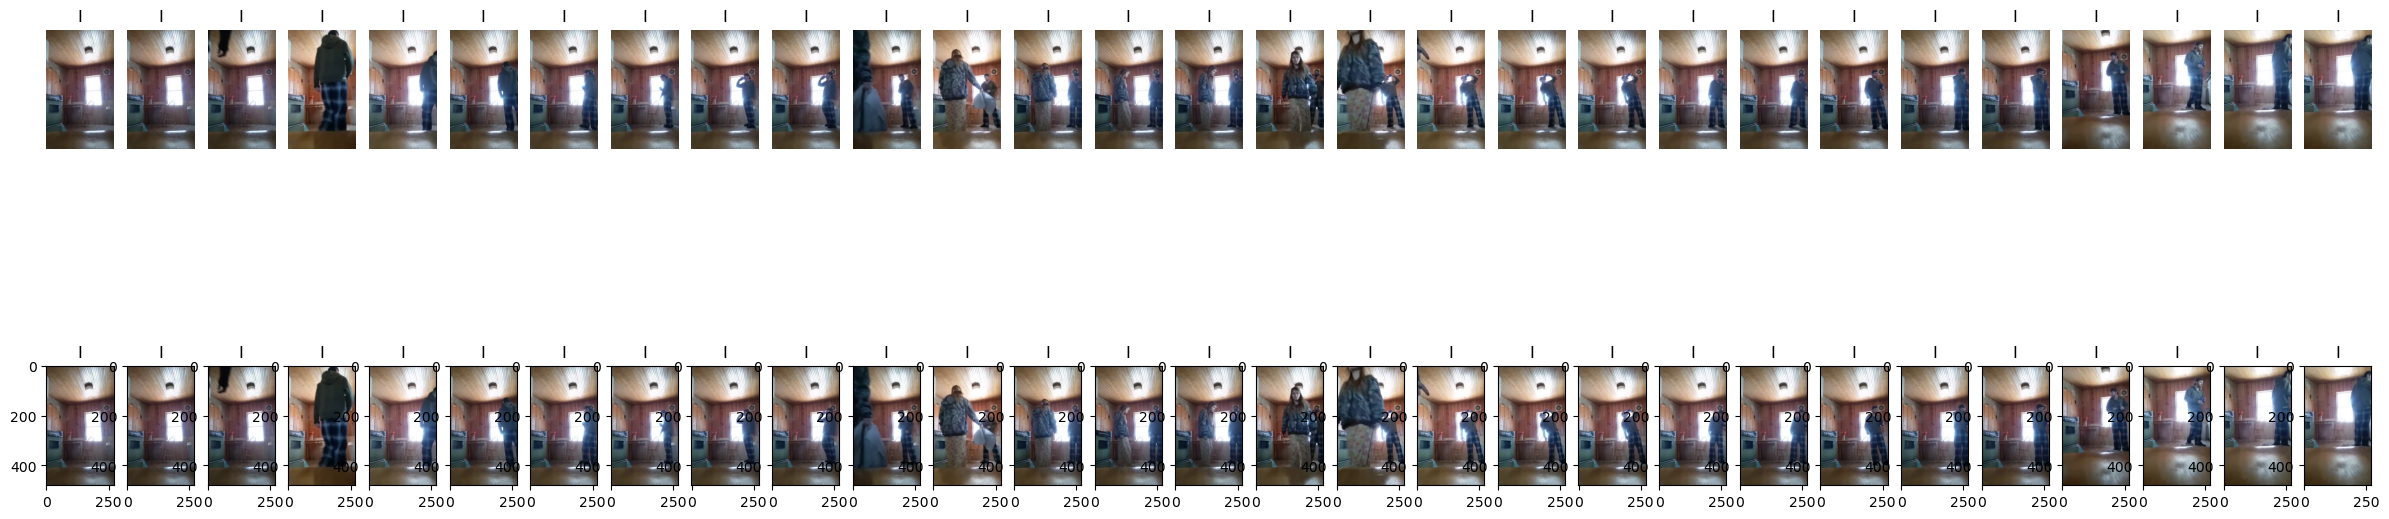

key_frame_indices [6, 18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150, 162]


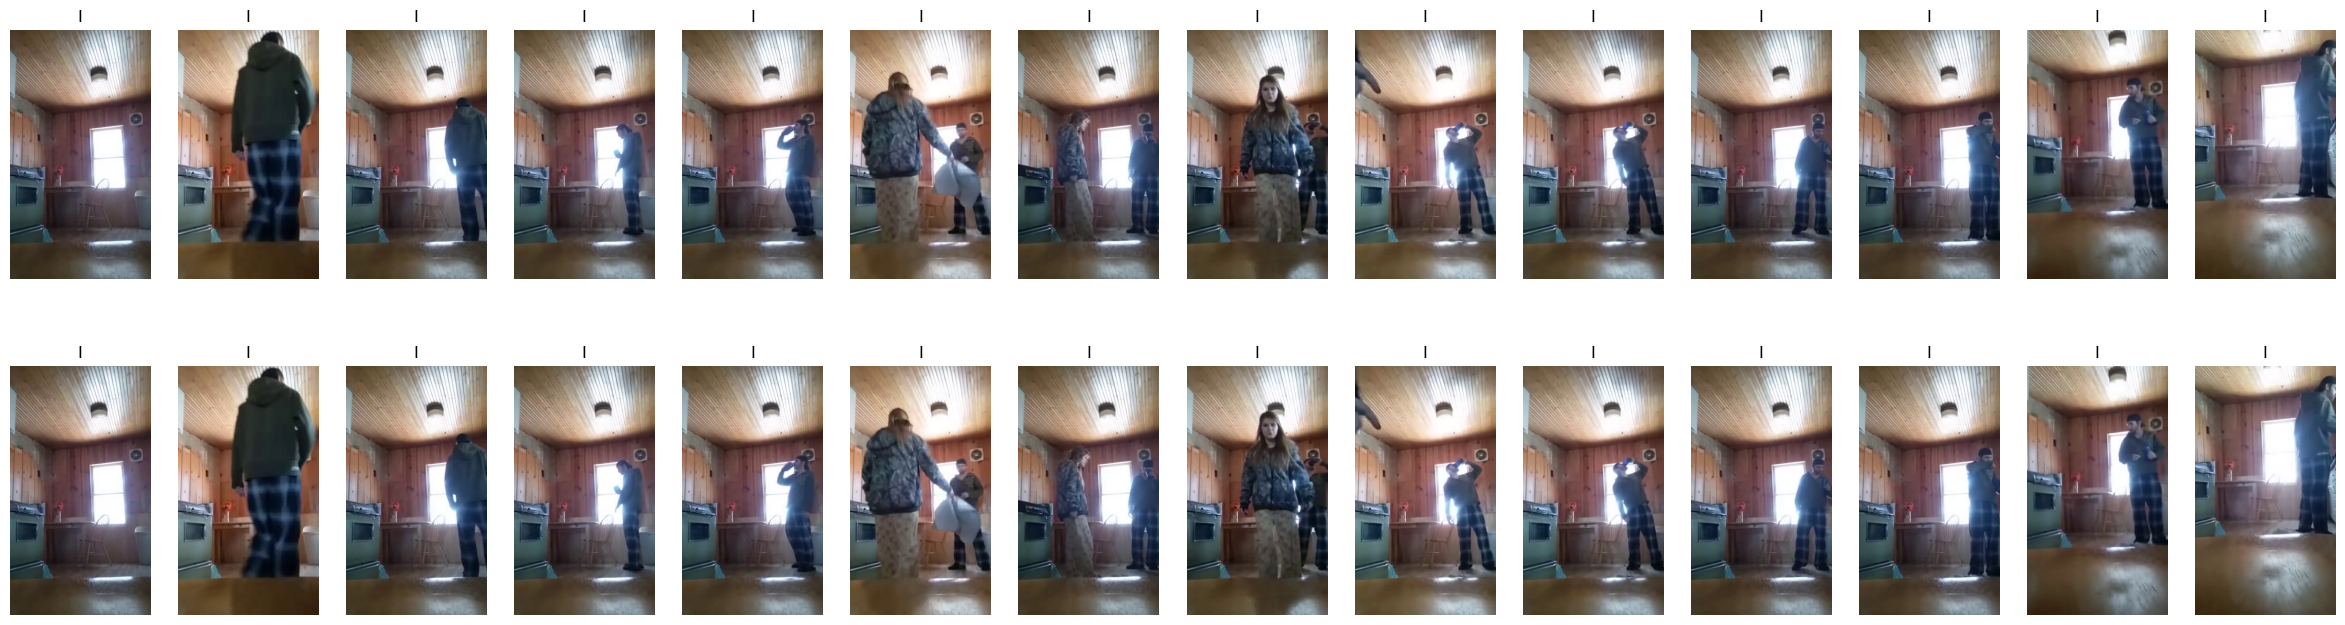

done!
[]
[['USER', "<video>\nProvide a comprehensive analysis of the video's content and themes?"]]
[['USER', "<video>\nProvide a comprehensive analysis of the video's content and themes?"], ['ASSISTANT', None]]
prompt A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <video>
Provide a comprehensive analysis of the video's content and themes? ASSISTANT:
["A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions. USER: <video>\nProvide a comprehensive analysis of the video's content and themes? ASSISTANT:"]


/home/jovyan/.mlspace/envs/video_vika/lib/python3.10/site-packages/transformers/generation/utils.py:1417: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/home/jovyan/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT/models/modeling_motion_tokenizer.py:433: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


The video showcases a man and a woman in a rustic kitchen, with the man pouring a drink into a glass and the woman walking around the room. The video also features a man standing in front of a table with a chair, and a man standing in front of a table with a chair. The video has a consistent theme of people in different positions and settings, with a focus on the kitchen and the people in it.


In [4]:
video_path = '/home/jovyan/shares/SR004.nfs2/data/LLaVA-Video-178K/LLaVA-Video-178K/0_30_s_academic_v0_1/academic_source/Charades/8UGNK.mp4'
prompt = "Provide a comprehensive analysis of the video's content and themes?"

output = runner({"video": video_path, "text_input": prompt}, length_penalty=1, \
        use_nucleus_sampling=False, num_beams=1, max_length=512, temperature=1.0)[0]
print(output)

In [ ]:
video_path = 'demo/video7013.mp4'
prompt = "What is the man doing in this video?"

output = runner({"video": video_path, "text_input": prompt}, length_penalty=1, \
        use_nucleus_sampling=False, num_beams=1, max_length=512, temperature=1.0)[0]
print(output)

In [ ]:
video7013.mp4

In [5]:
!pwd

/home/jovyan/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT


# long video

In [2]:
!cp /home/jovyan/shares/SR004.nfs2/data/LLaVA-Video-178K/LLaVA-Video-178K/1_2_m_academic_v0_1/academic_source/activitynet/v_XCXcwMyrqYM.mp4 /home/jovyan/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT

In [100]:
from conversation import default_conversation, DEFAULT_IMAGE_TOKEN, DEFAULT_VIDEO_TOKEN, VIDEO_TOKEN_INDEX, IMAGE_TOKEN_INDEX

DEFAULT_VISUAL_TOKEN = DEFAULT_VIDEO_TOKEN
VISUAL_TOKEN_INDEX = VIDEO_TOKEN_INDEX

In [3]:
import transformers
tokenizer = transformers.LlamaTokenizer.from_pretrained("/home/jovyan/shares/SR004.nfs2/chekalina/LaVIT/VideoLaVIT/models/language_model_sft", use_fast=False, padding_side='left')
tokenizer.pad_token = tokenizer.unk_token